# UN population projection: Migration scenarios
Compare variants, single country

In [10]:
# Import libraries
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk") # Size preset for graph

Dataset: [UN World Population Prospects 2022](https://population.un.org/wpp/Download/Standard/CSV/) in CSV format. Follow the link for the full explanation of what each category (column) means. Population numbers are written in thousands (i.e., 1000 = 1 mil).

In [11]:
# Load data from local file
file_url = r'data\WPP2022_TotalPopulationBySex.csv' # Path in Win11 format. You need to re-enter the path for Mac/Linux
df = pd.read_csv(file_url, low_memory=False)

In [12]:
df.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950.5,1245362.965,1253959.192,2499322.157,19.166
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1951,1951.5,1267473.182,1275657.198,2543130.380,19.502
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1952,1952.5,1291399.982,1298870.917,2590270.899,19.864
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1953,1953.5,1316659.222,1323619.574,2640278.797,20.247
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1954,1954.5,1342923.171,1349056.168,2691979.339,20.643


# Single country, compare projections

In [13]:
df['Location'].unique()

array(['World', 'Sub-Saharan Africa', 'Northern Africa and Western Asia',
       'Central and Southern Asia', 'Eastern and South-Eastern Asia',
       'Latin America and the Caribbean',
       'Oceania (excluding Australia and New Zealand)',
       'Australia/New Zealand', 'Europe and Northern America',
       'More developed regions', 'Less developed regions',
       'Least developed countries',
       'Less developed regions, excluding least developed countries',
       'Less developed regions, excluding China',
       'Land-locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)', 'High-income countries',
       'Middle-income countries', 'Upper-middle-income countries',
       'Lower-middle-income countries', 'Low-income countries',
       'No income group available', 'Africa', 'Eastern Africa', 'Burundi',
       'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya',
       'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique',
       'Réunion', 'R

In [14]:
# Select country (Location)
selected_location = 'Africa'
df = df[df['Location'] == selected_location]

In [15]:
# Unique values ('Variant')
df['Variant'].unique()

array(['Medium', 'High', 'Low', 'Constant fertility',
       'Instant replacement', 'Zero migration', 'Constant mortality',
       'No change', 'Momentum', 'Instant replacement zero migration',
       'Median PI', 'Upper 80 PI', 'Lower 80 PI', 'Upper 95 PI',
       'Lower 95 PI'], dtype=object)

In [19]:
# Filter by list: Projection variants (Variant)
variant_list = ['Low', 'Medium', 'High']
df = df[df['Variant'].isin(variant_list)]

In [20]:
df = df[['Time', 'Variant', 'PopTotal']]

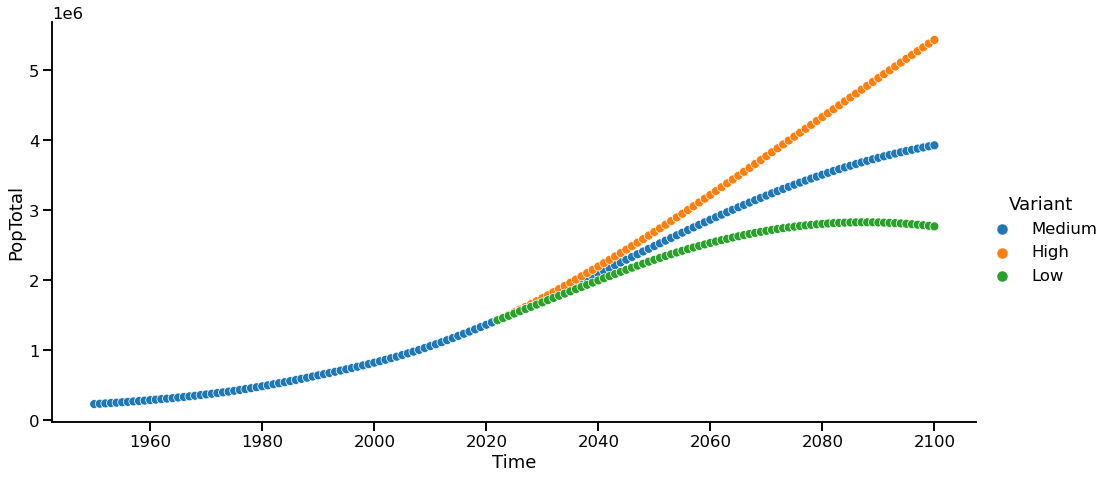

In [21]:
# Plot change in number over time for two categories:
sns.relplot(data=df, x="Time", y="PopTotal", hue="Variant", kind="scatter", height=7, aspect=2)